In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

In [3]:
wm = pd.read_csv(r'WineMatters.csv')
wm.head(10)

,WineID,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
0,1,65,265,White,0,0.0,Not Present,Aluminium,Single,0,...,2,4,2,3,3,0,0,6,6,4
1,2,47,2464,Red,310,305.0,Present,Aluminium,Single,4,...,0,2,2,3,4,0,0,8,6,4
2,3,15,2138,White,0,0.0,Not Present,Aluminium,Single,3,...,2,0,2,2,3,0,0,8,8,4
3,4,60,623,White,0,0.0,Not Present,Aluminium,Single,0,...,3,4,3,1,1,0,0,2,2,6
4,5,70,354,White,0,0.0,Not Present,Aluminium,Single,0,...,4,3,4,2,2,0,0,4,4,10
5,6,30,1894,Red,0,0.0,Not Present,Aluminium,Single,4,...,2,0,2,2,5,0,0,10,8,4
6,7,66,227,White,17,15.0,Not Present,Aluminium,Single,0,...,2,5,5,5,5,0,0,10,10,6
7,8,10,1812,Red,0,0.0,Not Present,Aluminium,Single,3,...,2,0,2,2,3,0,0,8,8,4
8,9,56,73,White,0,0.0,Present,Aluminium,Single,0,...,5,3,5,4,4,0,0,2,8,8
9,10,22,1556,Red,30,26.0,Not Present,Aluminium,Single,4,...,2,0,2,2,2,0,0,10,8,4


In [4]:
# Set WineID as an index
wm.set_index('WineID', inplace = True)

<b><font size="5">Duplicates</font><a class="anchor"><a id='toc'></a></b>

In [5]:
# Check if there are duplicate rows
wm[wm.duplicated(keep=False)]

,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,Floral,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
WineID,,,,,,,,,,,,,,,,,,,,,
354,33,3384,White,0,0.0,Very Few,Aluminium,Single,5,5,...,1,0,1,1,3,0,4,8,8,2
354,33,3384,White,0,0.0,Very Few,Aluminium,Single,5,5,...,1,0,1,1,3,0,4,8,8,2


There are two rows that are duplicated.

In [6]:
# Drop dulicate rows and check again
wm.drop_duplicates(inplace = True)
wm[wm.duplicated(keep=False)]

,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,Floral,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
WineID,,,,,,,,,,,,,,,,,,,,,


Now there are no more duplicated rows.

<b><font size="5">Coherence</font><a class="anchor"><a id='toc'></a></b>

In [7]:
# Check variable Cloudiness
wm['Cloudiness'].max()

6

In [8]:
# Redefine values that are higher than 5 to 5
wm.loc[wm['Cloudiness']>5,'Cloudiness']=5
wm['Cloudiness'].max()

5

In [9]:
# For safety reasons we did it for all variables
wm.loc[wm['Acidity']>5,'Acidity']=5
wm.loc[wm['Floral']>5,'Floral']=5
wm.loc[wm['Wood']>5,'Wood']=5
wm.loc[wm['Sweetness']>5,'Sweetness']=5
wm.loc[wm['Red_Fruit']>5,'Red_Fruit']=5
wm.loc[wm['Citric']>5,'Citric']=5
wm.loc[wm['Density']>5,'Density']=5
wm.loc[wm['Color_Intensity']>5,'Color_Intensity']=5
wm.loc[wm['Cloudiness']>5,'Cloudiness']=5
wm.loc[wm['Alcohol']>5,'Alcohol']=5
wm.loc[wm['Astringency']>5,'Astringency']=5

In [10]:
wm.loc[wm['Satisfaction_France']>10,'Satisfaction_France']=10
wm.loc[wm['Satisfaction_Spain']>10,'Satisfaction_Spain']=10
wm.loc[wm['Satisfaction_Portugal']>10,'Satisfaction_Portugal']=10

In [11]:
# Check the frequency of each level in variables Satisfaction_France, Satisfaction_Spain and Satisfaction_Portugal
wm['Satisfaction_France'].value_counts()

8     48240
10    35748
6     24485
4     13432
2      7975
Name: Satisfaction_France, dtype: int64

In [12]:
wm['Satisfaction_Spain'].value_counts()

8     48795
10    35916
6     23984
4     13412
2      7768
0         5
Name: Satisfaction_Spain, dtype: int64

In [13]:
wm['Satisfaction_Portugal'].value_counts()

8     35181
6     30780
10    29973
4     18573
2     15359
0        14
Name: Satisfaction_Portugal, dtype: int64

As we can see all numbers are even. Therefore for easier data handling we could change the scale to 0-5 instead of 0-10.

In [14]:
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(2,1)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(4,2)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(6,3)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(8,4)
wm['Satisfaction_France'] = wm['Satisfaction_France'].replace(10,5)

In [15]:
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(2,1)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(4,2)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(6,3)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(8,4)
wm['Satisfaction_Spain'] = wm['Satisfaction_Spain'].replace(10,5)

In [16]:
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(2,1)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(4,2)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(6,3)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(8,4)
wm['Satisfaction_Portugal'] = wm['Satisfaction_Portugal'].replace(10,5)

<b><font size="5">Check Missing Values before Outliers</font><a class="anchor"><a id='toc'></a></b>

In [17]:
# Check sum of missing value per variable
wm.isna().sum()

Aging_Time                 0
Litters_Barrel             0
Type                       0
Magnesium                  0
Residual_Sugar           391
Sulphites                  0
Barrel                    56
Grapes                     8
Acidity                    0
Floral                     0
Wood                       0
Sweetness                  0
Red_Fruit                  0
Citric                     0
Density                    0
Color_Intensity            0
Cloudiness                 0
Alcohol                    0
Astringency                0
Satisfaction_France        0
Satisfaction_Spain         0
Satisfaction_Portugal      0
dtype: int64

<b><font size="5">Outliers</font><a class="anchor"><a id='toc'></a></b>

@ReportGroup: also check the notebook "Outliers last"

For outliers, we only check floats and integers who aren't in a scale because in a scale (especially only until 10, the outcome is based on personal factors). Of course, categorical variables also can't be checked on outliers.

So we are left with Aging_Time, Litters_Barrel, Magnesium and Residual_Sugar. For these we will gonna draw a boxplot.

<AxesSubplot:xlabel='Residual_Sugar'>

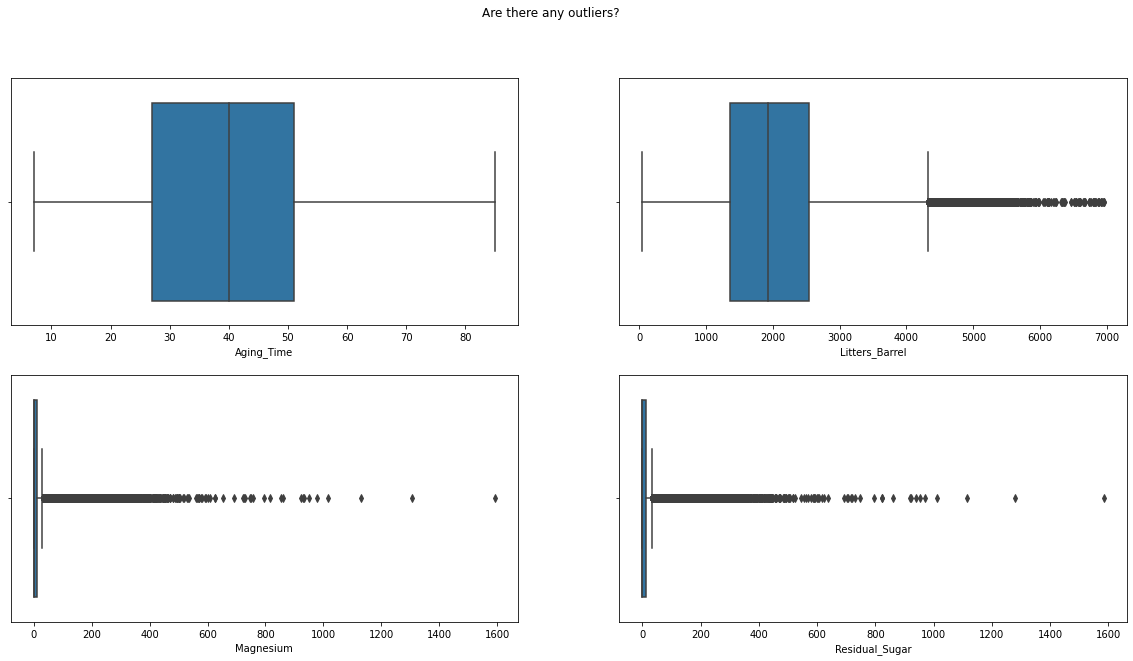

In [18]:
# Plotting a 2 rows X 2 columns plot showing all boxplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Headline for the 2 rows X 2 columns plot
fig.suptitle('Are there any outliers?')

# Defining all boxplots shown in the 6 rows X 3 columns plot
sns.boxplot(ax = axes[0,0], x='Aging_Time', data = wm)
sns.boxplot(ax=axes[0, 1], x='Litters_Barrel', data = wm)
sns.boxplot(ax=axes[1, 0], x='Magnesium', data = wm)
sns.boxplot(ax=axes[1, 1], x='Residual_Sugar', data = wm)

As we can see there are only outliers in Litters_Barrel, Magnesium and Residual_Sugar for which we will treat the outliers.

For a more detailed outlier treatment please check the notebook "Outliers last".

In [19]:
#Cleaning outliers Magnesium
wm_after_Magnesium=wm[wm['Magnesium'] < 440]
wm_after_Magnesium.shape

(129810, 22)

In [20]:
#Cleaning outliers Residual Sugar
wm_after_ResidualSugar=  wm_after_Magnesium[wm_after_Magnesium['Residual_Sugar'] < 450]
wm_after_ResidualSugar.shape

(129416, 22)

In [21]:
#Cleaning outliers Litters per Barrel
wm_after_outliers =  wm_after_ResidualSugar[wm_after_ResidualSugar['Litters_Barrel'] < 6420]
wm_after_outliers.shape

(129374, 22)

In [22]:
# Assign wm_after_outliers to wm_cleaned
wm_cleaned = wm_after_outliers

In [23]:
wm_cleaned.shape

(129374, 22)

<b><font size="5">Missing Values</font><a class="anchor"><a id='toc'></a></b>

Use median not mode

In [24]:
# Check sum of missing value per variable
wm_cleaned.isna().sum()

Aging_Time                0
Litters_Barrel            0
Type                      0
Magnesium                 0
Residual_Sugar            0
Sulphites                 0
Barrel                   56
Grapes                    8
Acidity                   0
Floral                    0
Wood                      0
Sweetness                 0
Red_Fruit                 0
Citric                    0
Density                   0
Color_Intensity           0
Cloudiness                0
Alcohol                   0
Astringency               0
Satisfaction_France       0
Satisfaction_Spain        0
Satisfaction_Portugal     0
dtype: int64

We have missing values for Barrel and Grapes.

The missing values for the outliers were deleted when the outliers were deleted (for example there were 391 missing values in Sulphites).

Barrel and Grapes are both categorical variables. Because the missing values in the categorical variables are less than 3% of all values we can drop them.

In [25]:
# Remove missing values from categorical variables
wm_cleaned = wm_cleaned.dropna(axis = 0, how ='any')

In [26]:
# Checking sum of missing value per variable after treatment of Barrel and Grapes
wm_cleaned.isna().sum()

Aging_Time               0
Litters_Barrel           0
Type                     0
Magnesium                0
Residual_Sugar           0
Sulphites                0
Barrel                   0
Grapes                   0
Acidity                  0
Floral                   0
Wood                     0
Sweetness                0
Red_Fruit                0
Citric                   0
Density                  0
Color_Intensity          0
Cloudiness               0
Alcohol                  0
Astringency              0
Satisfaction_France      0
Satisfaction_Spain       0
Satisfaction_Portugal    0
dtype: int64

In [27]:
wm_cleaned.shape

(129310, 22)

As we can see with cleaned shape the 64 rows (129374 - 129310 = 64) with missing values got dropped.

<b><font size="5">Treating Categorical values (Dummies)</font><a class="anchor"><a id='toc'></a></b>

By checking the frequency of each level in categorical variable Sulphites we found out that there are the four variables:
- Present        
- Not Present    
- Very Few       
- 0

For easier data handling, a new variable will be created and used instead. Sulphites will be converted into a binary variable where Sulphites Presence (Present and Very Few) is indicated by 1 or else 0 (Not Presen and 0).

In [28]:
# Create new variable Sulphites-Presence
wm_cleaned['Sulphites_Presence'] = np.where((wm_cleaned['Sulphites']=='Very Few')|
                                    (wm_cleaned['Sulphites']=='Present'),1,0)

# Drop old variable Sulphites
wm_cleaned.drop(labels = ['Sulphites'], axis = 1, inplace = True)

All the others categorical variables only have two variables, so we identify one of them to be the main one.

In [29]:
# Create new variable Type_White
wm_cleaned['Type_White'] = np.where((wm_cleaned['Type']=='White'),1,0)

# Drop old variable Type
wm_cleaned.drop(labels = ['Type'], axis = 1, inplace = True)

In [30]:
# Create new variable Barrel_Wooden
wm_cleaned['Barrel_Wooden'] = np.where((wm_cleaned['Barrel']=='Wooden'),1,0)

# Drop old variable Barrel
wm_cleaned.drop(labels = ['Barrel'], axis = 1, inplace = True)

In [31]:
# Create new variable Grapes_Single
wm_cleaned['Grapes_Single'] = np.where((wm_cleaned['Grapes']=='Single'),1,0)

# Drop old variable Grapes
wm_cleaned.drop(labels = ['Grapes'], axis = 1, inplace = True)

In [32]:
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,3,0,0,3,3,2,0,1,0,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,4,0,0,4,3,2,1,0,0,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,3,0,0,4,4,2,0,1,0,1
4,60,623,0,0.0,0,4,0,3,3,4,...,1,0,0,1,1,3,0,1,0,1
5,70,354,0,0.0,0,4,0,3,4,3,...,2,0,0,2,2,5,0,1,0,1


<b><font size="5">Scale</font><a class="anchor"><a id='toc'></a></b>

In [33]:
# Create a new dataset named finalDatathat will contain the columns from wm.
finalData = wm_cleaned[['Aging_Time', 'Litters_Barrel', 'Magnesium', 'Residual_Sugar']]

In [34]:
# Create an instance of MinMaxScaler() named minmax_scaler.
minmax_scaler = MinMaxScaler()

In [35]:
# Use the .fit()method of minmax_scaler to fit the scaler to finalData and assign the results to the object scale
scale = minmax_scaler.fit(finalData)

In [36]:
# Use the .transform() method of scale to apply MinMaxScaler to finalData and assign it to the object minmax_data.
minmax_data = scale.transform(finalData)

In [37]:
# Create a new dataset named minmax_data that will contain the command : pd.DataFrame(minmax_data, columns = finalData.columns).

minmax_data = pd.DataFrame(minmax_data, columns = finalData.columns)
minmax_data.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar
0,0.743590,0.034003,0.000000,0.000000
1,0.512821,0.381781,0.707763,0.693182
2,0.102564,0.330223,0.000000,0.000000
3,0.679487,0.090622,0.000000,0.000000
4,0.807692,0.048078,0.000000,0.000000


In [38]:
# Drop old unscaled columns Aging_Time, Litters_Barrel, Magnesium and Residual_Sugar
wm_cleaned.pop('Aging_Time')
wm_cleaned.pop('Litters_Barrel')
wm_cleaned.pop('Magnesium')
wm_cleaned.pop('Residual_Sugar')

WineID
1           0.0
2         305.0
3           0.0
4           0.0
5           0.0
          ...  
129876      0.0
129877    172.0
129878    163.0
129879    205.0
129880    186.0
Name: Residual_Sugar, Length: 129310, dtype: float64

In [39]:
# Change start index to 1 to join dataframes minmax_data and wm_cleaned
minmax_data.index += 1 
wm_cleaned = minmax_data.join(wm_cleaned)

In [40]:
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
1,0.743590,0.034003,0.000000,0.000000,0.0,5.0,0.0,2.0,2.0,4.0,...,3.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0
2,0.512821,0.381781,0.707763,0.693182,4.0,2.0,0.0,3.0,0.0,2.0,...,4.0,0.0,0.0,4.0,3.0,2.0,1.0,0.0,0.0,1.0
3,0.102564,0.330223,0.000000,0.000000,3.0,4.0,0.0,3.0,2.0,0.0,...,3.0,0.0,0.0,4.0,4.0,2.0,0.0,1.0,0.0,1.0
4,0.679487,0.090622,0.000000,0.000000,0.0,4.0,0.0,3.0,3.0,4.0,...,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0
5,0.807692,0.048078,0.000000,0.000000,0.0,4.0,0.0,3.0,4.0,3.0,...,2.0,0.0,0.0,2.0,2.0,5.0,0.0,1.0,0.0,1.0


<b><font size="5">Create new Variables</font><a class="anchor"><a id='toc'></a></b>

To see if customers overall like the wine, we gonna create a new variable Satisfaction_General. 

For that, we are going to calculate the average over the three countries.

If it is higher than 5 (6-10), it will be declared as a good wine (indicate as 1).
If it is equal or less than 5 (0-5), it will be declared as a bad wine (indicate as 0).

In [85]:
# Get values and calculate average, then multiply by 2 to scale it in 0-10
avgS = ((wm['Satisfaction_France'] + wm['Satisfaction_Spain'] + wm['Satisfaction_Portugal'])/3)*2

# Create a list to store in 0s and 1s
winerate = []

#Loop to append values after if statement
for avg in avgS:
    if (avg > 5):
        wr = 1
        winerate.append(wr)
    else:
        wr = 0
        winerate.append(wr)

#Add column with winerate values
wm['Satisfaction_General'] = winerate

wm.head()

,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,Floral,...,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Satisfaction_General
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,White,0,0.0,Not Present,Aluminium,Single,0,5,...,4,2,3,3,0,0,3,3,2,1
2,47,2464,Red,310,305.0,Present,Aluminium,Single,4,2,...,2,2,3,4,0,0,4,3,2,1
3,15,2138,White,0,0.0,Not Present,Aluminium,Single,3,4,...,0,2,2,3,0,0,4,4,2,1
4,60,623,White,0,0.0,Not Present,Aluminium,Single,0,4,...,4,3,1,1,0,0,1,1,3,0
5,70,354,White,0,0.0,Not Present,Aluminium,Single,0,4,...,3,4,2,2,0,0,2,2,5,1


<b><font size="5">Correlations</font><a class="anchor"><a id='toc'></a></b>

<AxesSubplot:>

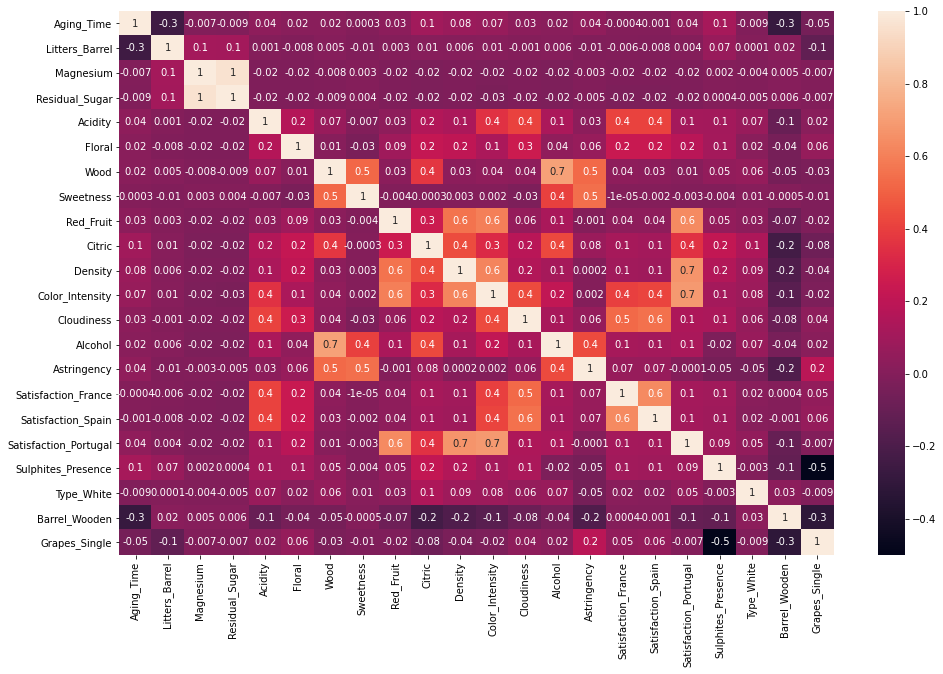

In [40]:
# Create new dataframe for correlations
wm_corr = wm_cleaned.copy()
# Create new dataframe named corr with the correlation between the variables, using the corr()method
corr = wm_corr.corr()
# Create a figure 
figure = plt.figure(figsize=(16,10))
# Create a heatmap plot
sns.heatmap(data = corr, annot=True, fmt = '.1g')

<b><font size="5">Segmentation of the Variables</font><a class="anchor"><a id='toc'></a></b>

There are two segmentation which will be used from now on:
- flavor/ feeling
- production characteristics

In [41]:
# Definition of flavor/ feeling segmentation in wm_flavfeel
wm_flavfeel = wm_cleaned[['Residual_Sugar','Acidity','Floral','Wood','Sweetness','Red_Fruit','Citric','Density','Cloudiness','Alcohol','Astringency']].copy()

In [42]:
# Definition of production characteristics segmentation in wm_prodchar
wm_prodchar = wm_cleaned[['Aging_Time','Litters_Barrel','Type_White','Magnesium','Sulphites_Presence','Barrel_Wooden','Grapes_Single','Color_Intensity','Satisfaction_France','Satisfaction_Spain','Satisfaction_Portugal']].copy()